# SECTION 3.3: MTOT

In [1]:
import sys
import pickle
from numpy import *

sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Preparing')
sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Formatting')
sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Model')

import treal_functions
import slopes_functions
import prepare_functions
import cuspcore_aux
import cuspcore_plots
import evolving
import fitting as fit
from cuspcore_aux import *
from cuspcore_plots import *
from evolving import *

reload(cuspcore_aux)
reload(cuspcore_plots)
reload(evolving)
reload(fit)
reload(treal_functions)
reload(slopes_functions)
reload(prepare_functions)

sim = ['g1.08e11'][0]
directory='/cs/sci/freundlich/CUSPCORE/Analysis/DATA/'
directory='/cs/sci/freundlich/CUSPCORE/Michael/' 

with open(directory+'NIHAO-%s.pickle'%sim[1:]) as f:
    gl = pickle.load(f)
 
gl = slopes_functions.derive_slopes(gl,polyorder=3,sigma = 21,mode= 'interp',double_smooth=False,rlim=[-2.,0.],use_fangzhou_Rvir=True)    
gl = prepare_functions.define_brho(gl,polyorder=3,sigma = 21,mode= 'interp',double_smooth=False,rlim=[-2.,0.],use_fangzhou_Rvir=True)
treal=treal_functions.load_or_create_gl(sim)

fitrange=prepare_functions.get_fitrange(gl)
gl=prepare_functions.reduce_range_gl(gl,fitrange)
treal=prepare_functions.reduce_range_Treal(treal,fitrange)

a_array=[]

for (i,ss) in zip(range(size(gl)),gl):
    a_array.append(ss['a'])           

a_array=array(a_array)

ok_fangzhou,r12_fangzhou,rvir_fangzhou,mvir_fangzhou=get_fangzhou_radii(sim,a_array,get_all=False)
gl=fit.do_fits(gl,rvir_fangzhou,mvir_fangzhou,1.,0.01,2.,components=['d'])
print 'Done'

/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


 
Loading existing file Treal-1.08e11.pickle
Reducing the range of gl
Reducing the range of Treal
Done


In [2]:
# FIGURE PROPERTIES

fontsize=20
legendsize=fontsize
linewidth=2
linesize=5
ticksize=fontsize-4
figsize=(8,16)
figsize=(8,6)

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 6
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 3
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 6
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 3
rcParams['ytick.minor.width'] = 1
rcParams['xtick.labelsize'] = fontsize
rcParams['ytick.labelsize'] = fontsize

rcParams['figure.subplot.left']=0.15
rcParams['figure.subplot.right']=0.95
rcParams['figure.subplot.bottom']=0.15
rcParams['figure.subplot.top']=0.95
rcParams['figure.subplot.wspace']=0.1
rcParams['figure.subplot.hspace']=0.1


-0.0719366489823 0.0116647038124
Mtot/Mdm = 1.0272 (r/Rvir)^-0.0719
1.0272229265 0.0719366489823


([<matplotlib.axis.YTick at 0x7fb7f21ab5d0>,
 <a list of 5 Text yticklabel objects>)

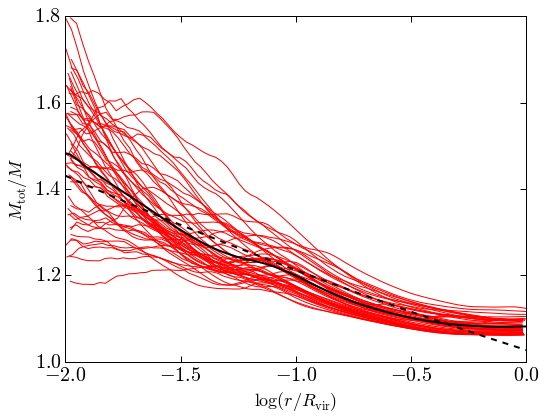

In [3]:
# COMPONENT FRACTIONS IN ALL OUTPUTS

tmin=3.

from scipy.interpolate import interp1d

figure(figsize=figsize)
counter=0

xlabel(r'$\log(r/R_{\rm vir})$')
ylabel(r'$M_{\rm tot}/M$')

fd_all=[]
fg_all=[]
fs_all=[]
xall=10**linspace(-2, 0,100)

for (ss, i) in zip(gl, range(size(gl))):
    r= ss['d']['r']
    t=ss['t']
    Rvir=rvir_fangzhou[i]
    Mvir=mvir_fangzhou[i]
    R12=r12_fangzhou[i]
    Kvir=0.5*G*Mvir/Rvir
    logr=log10(ss['d']['r']/ss['Rvir'])
    t=ss['t']

    if size(r)>0 and t>tmin:
        rmin=max(ss['d']['r'][0],ss['s']['r'][0],ss['g']['r'][0],ss['all']['r'][0])
    
        Md = ss['d']['M'][where(ss['d']['r']>rmin)]
        Mg = ss['g']['M'][where(ss['d']['r']>rmin)]
        Ms = ss['s']['M'][where(ss['d']['r']>rmin)]
        Ma = ss['all']['M'][where(ss['d']['r']>rmin)]
        rr=r[where(ss['d']['r']>rmin)]
    
        fd=Md/Ma
        fg=Mg/Ma
        fs=Ms/Ma
        
        Md_allr = ss['d']['M']
        Mg_allr = ss['g']['M']
        Ms_allr = ss['s']['M']
        Ma_allr = ss['all']['M']
        rr_allr=r
        
        fd_allr=Md_allr/Ma_allr
        fg_allr=Mg_allr/Ma_allr
        fs_allr=Ms_allr/Ma_allr
        
        fd_interp=interp(xall,rr_allr/Rvir, fd_allr)       
        fd_all.append(fd_interp)
        fg_interp=interp(xall,rr_allr/Rvir, fg_allr)       
        fg_all.append(fg_interp)
        fs_interp=interp(xall,rr_allr/Rvir, fs_allr)       
        fs_all.append(fs_interp)
            
        if counter==0:
            plot(log10(rr_allr/Rvir),1/fd_allr,color='r',lw=1,label='dark matter')
        else:
            plot(log10(rr_allr/Rvir),1/fd_allr,color='r',lw=1)
        
        counter+=1

fd_all=array(fd_all)
fg_all=array(fg_all)
fs_all=array(fs_all)
fd_mean=mean(fd_all,axis=0)
fg_mean=mean(fg_all,axis=0)
fs_mean=mean(fs_all,axis=0)

plot(log10(xall),1/fd_mean,color='k',linestyle='-',lw=2)  

slope, intercept, r_value, p_value, std_err = stats.linregress(log10(xall),log10(1./fd_mean))
print slope, intercept
plot(log10(xall),10**(intercept+slope*log10(xall)),'k--',lw=2)
print 'Mtot/Mdm = %.4f (r/Rvir)^%.4f'%(10**intercept,slope)
Mratio0=10**intercept
n=-slope
print Mratio0, n

xticknames=[r'$-2.0$',r'$-1.5$',r'$-1.0$',r'$-0.5$',r'$0.0$']
xticks([-2.,-1.5,-1.,-0.5,0],xticknames,visible=True)
yticknames=[r'$1.0$',r'$1.2$',r'$1.4$',r'$1.6$',r'$1.8$']
yticks([1,1.2,1.4,1.6,1.8],yticknames,visible=True)


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


-0.0719366489823 0.0116647038124
Mtot/Mdm = 1.0272 (r/Rvir)^-0.0719
1.0272229265 0.0719366489823


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


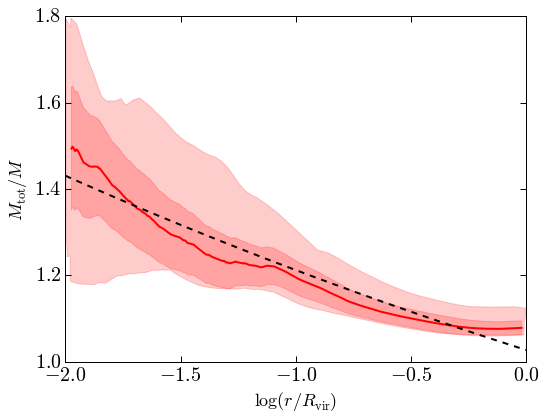

In [4]:
# COMPONENT FRACTIONS IN ALL OUTPUTS

tmin=3.
abscisse=log10(logspace(-2,0,1000))
alpha_fill=0.2
f_curve=[]

from scipy.interpolate import interp1d

figure(figsize=figsize)

xlabel(r'$\log(r/R_{\rm vir})$')#,fontsize=fontsize)
ylabel(r'$M_{\rm tot}/M$')#,fontsize=fontsize) 

fd_all=[]
fg_all=[]
fs_all=[]
xall=10**linspace(-2, 0,100)

for (ss, i) in zip(gl, range(size(gl))):
    r= ss['d']['r']
    t=ss['t']
    Rvir=rvir_fangzhou[i]
    Mvir=mvir_fangzhou[i]
    R12=r12_fangzhou[i]
    Kvir=0.5*G*Mvir/Rvir
    logr=log10(ss['d']['r']/ss['Rvir'])
    t=ss['t']

    if size(r)>0 and t>tmin:
        rmin=max(ss['d']['r'][0],ss['s']['r'][0],ss['g']['r'][0],ss['all']['r'][0])
    
        Md = ss['d']['M'][where(ss['d']['r']>rmin)]
        Mg = ss['g']['M'][where(ss['d']['r']>rmin)]
        Ms = ss['s']['M'][where(ss['d']['r']>rmin)]
        Ma = ss['all']['M'][where(ss['d']['r']>rmin)]
        rr=r[where(ss['d']['r']>rmin)]
    
        fd=Md/Ma
        fg=Mg/Ma
        fs=Ms/Ma
        
        Md_allr = ss['d']['M']
        Mg_allr = ss['g']['M']
        Ms_allr = ss['s']['M']
        Ma_allr = ss['all']['M']
        rr_allr=r
        
        fd_allr=Md_allr/Ma_allr
        fg_allr=Mg_allr/Ma_allr
        fs_allr=Ms_allr/Ma_allr
        
        fd_interp=interp(xall,rr_allr/Rvir, fd_allr)       
        fd_all.append(fd_interp)
        fg_interp=interp(xall,rr_allr/Rvir, fg_allr)       
        fg_all.append(fg_interp)
        fs_interp=interp(xall,rr_allr/Rvir, fs_allr)       
        fs_all.append(fs_interp)
    
        f_curve.append(list(interp(abscisse,log10(rr_allr/Rvir),1/fd_allr,left=nan,right=nan)))

f_curve=array(f_curve)
fd_all=array(fd_all)
fg_all=array(fg_all)
fs_all=array(fs_all)
fd_mean=mean(fd_all,axis=0)
fd_median=mean(fd_all,axis=0)
fg_mean=mean(fg_all,axis=0)
fs_mean=mean(fs_all,axis=0)

f_min=nan*ones_like(abscisse)
f_max=nan*ones_like(abscisse)
f_med=nan*ones_like(abscisse)
f_mean=nan*ones_like(abscisse)
f_std=nan*ones_like(abscisse)

for i in range(size(abscisse)):
    try:
        f_min[i]=amin(array_nonan(f_curve[:,i]))
        f_max[i]=amax(array_nonan(f_curve[:,i]))
        f_med[i]=median((f_curve[:,i]))
        f_mean[i]=mean((f_curve[:,i]))
        f_std[i]=std((f_curve[:,i]))
    except:
        continue

fill_between(abscisse,f_min,f_max,color='r',alpha=alpha_fill)
fill_between(abscisse,f_med-f_std,f_med+f_std,color='r',alpha=alpha_fill)
plot(abscisse,f_med,color='r',lw=2)

slope, intercept, r_value, p_value, std_err = stats.linregress(log10(xall),log10(1./fd_median))
print slope, intercept
plot(log10(xall),10**(intercept+slope*log10(xall)),'k--',lw=2)
print 'Mtot/Mdm = %.4f (r/Rvir)^%.4f'%(10**intercept,slope)
Mratio0=10**intercept
n=-slope
print Mratio0, n

xticknames=[r'$-2.0$',r'$-1.5$',r'$-1.0$',r'$-0.5$',r'$0.0$']
xticks([-2.,-1.5,-1.,-0.5,0],xticknames,visible=True)
yticknames=[r'$1.0$',r'$1.2$',r'$1.4$',r'$1.6$',r'$1.8$']
yticks([1,1.2,1.4,1.6,1.8],yticknames,visible=True)
